In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# List of Drugs to Analyze
drug_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Graph markers
graph_markers = ["o","^","s","d"]

In [2]:
# Read the Mouse and Drug Data
df_mouse_drug = pd.read_csv(mouse_drug_data_to_load)
df_mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
# Read the Clinical Trial Data
df_Clini_trial = pd.read_csv(clinical_trial_data_to_load)
df_Clini_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
df_drug_response = pd.merge(df_mouse_drug, df_Clini_trial, how="inner", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df_drug_response

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [5]:
# Drug under comparision study, get the list from "drug_list"
# Create a Dataframe by filtering the drugs under study
df_4drug_response = df_drug_response[df_drug_response.Drug.isin(drug_list)]
df_4drug_response

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [6]:
# Group the data based on Drug and Timepoint
response_byDgTp = df_4drug_response.groupby(["Drug","Timepoint"])

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_Mean_TumorVol_DgTp = response_byDgTp \
    .agg(
    {        
        "Tumor Volume (mm3)" : "mean"
    })
df_Mean_TumorVol_DgTp = df_Mean_TumorVol_DgTp.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Vol (mm3)"})

# Convert to DataFrame
df_Mean_TumorVol_DgTp.reset_index(inplace=True)

# Preview DataFrame
df_Mean_TumorVol_DgTp

,Drug,Timepoint,Mean Tumor Vol (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_SE_TumorVol_DgTp = response_byDgTp \
    .agg(
    {        
        "Tumor Volume (mm3)" : "sem"
    })
df_SE_TumorVol_DgTp = df_SE_TumorVol_DgTp.rename(columns={"Tumor Volume (mm3)": "SE Tumor Vol (mm3)"})

# Convert to DataFrame
df_SE_TumorVol_DgTp.reset_index(inplace=True)

# Preview DataFrame
df_SE_TumorVol_DgTp

,Drug,Timepoint,SE Tumor Vol (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [9]:
# Minor Data Munging to Re-Format the Data Frames - Mean Tumor Volume
# Reformating the Mean Tumor Volume Dataframe
df_Mean_TumorVol_ReF = df_Mean_TumorVol_DgTp.pivot(index ='Timepoint', columns ='Drug')

# Preview that Reformatting worked
df_Mean_TumorVol_ReF =  df_Mean_TumorVol_ReF["Mean Tumor Vol (mm3)"]
df_Mean_TumorVol_ReF.reset_index(inplace=True)
df_Mean_TumorVol_ReF

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


In [10]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error for Tumor Volume
# Reformating the Standard Error Tumor Volume Dataframe
df_SE_TumorVol_ReF = df_SE_TumorVol_DgTp.pivot(index ='Timepoint', columns ='Drug')

# Preview that Reformatting worked
df_SE_TumorVol_ReF =  df_SE_TumorVol_ReF["SE Tumor Vol (mm3)"]
df_SE_TumorVol_ReF.reset_index(inplace=True)
df_SE_TumorVol_ReF

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.235102,0.264819,0.218091
2,10,0.702684,0.282346,0.357421,0.402064
3,15,0.838617,0.357705,0.580268,0.614461
4,20,0.909731,0.476210,0.726484,0.839609
5,25,0.881642,0.550315,0.755413,1.034872
6,30,0.934460,0.631061,0.934121,1.218231
7,35,1.052241,0.984155,1.127867,1.287481
8,40,1.223608,1.055220,1.158449,1.370634
9,45,1.223977,1.144427,1.453186,1.351726


In [11]:
# df_Mean_TumorVol_ReF.columns.values
for column in df_Mean_TumorVol_ReF.columns:
    print(column)

Timepoint
Capomulin
Infubinol
Ketapril
Placebo


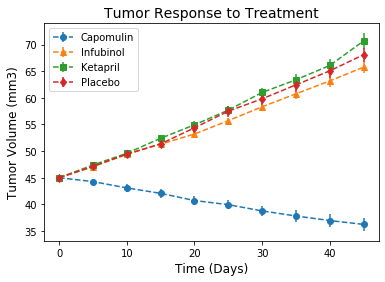

In [12]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
i=0
for drug in drug_list:  
    
    ax.errorbar(df_Mean_TumorVol_ReF["Timepoint"], \
                df_Mean_TumorVol_ReF[drug], \
                yerr=df_SE_TumorVol_ReF[drug], \
                label=drug, fmt=graph_markers[i], linestyle='--')
    i=i+1

#Legend: Place it for best fit
ax.legend(loc='best', frameon=True)

#Title, X and Y axis labels
ax.set_title('Tumor Response to Treatment', fontsize=14)
ax.set_xlabel('Time (Days)', fontsize=12)
ax.set_ylabel('Tumor Volume (mm3)', fontsize=12)

# Save the Figure
fig.savefig("Images/Tumor_Response_to_Treatment.png")

In [13]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [16]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [17]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [19]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [20]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [22]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)